In [24]:
import matplotlib as m
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import geopandas as gpd
import numpy as np
import copy
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [25]:
fraction = pd.read_csv('C:/Users/15311/Desktop/country_classify_final.csv')

In [26]:
# wholewolrd concentrations
wholeworld = gpd.read_file('C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_bio.shp')
A = ['agr','ene','ind','nrtr','rcor','rcoc','rcoo','shp','slv','wst']
for j in A:
    read_shp = gpd.read_file(r'C:/Users/15311/Desktop/new_results/output_wholeworld/wholeworld_' + j + '.' + 'shp')
    wholeworld['TotalPM25'] += read_shp['TotalPM25']

In [27]:
# ROW concentrations
ROW = gpd.read_file('C:/Users/15311/Desktop/new_results/output_ROW/ROW_agr.shp')
B = ['ene','ind','nrtr','rcor','rcoc','rcoo','shp','slv','wst']
for j in B:
    read_shp = gpd.read_file(r'C:/Users/15311/Desktop/new_results/output_ROW/ROW_' + j + '.' + 'shp')
    ROW['TotalPM25'] += read_shp['TotalPM25']

In [28]:
ROW

,AllCause,BasePM25,NH3,NOx,PNH4,PNO3,PSO4,SOA,SOx,TotalPM25,TotalPop,TotalPopD,geometry
0,0.0,0.426418,6.686837e-09,1.757977e-08,7.732357e-08,2.127443e-08,0.0,0.0,0.0,0.000228,0.000000,0.0,"POLYGON ((-180.00000 -88.00000, -175.00000 -88..."
1,0.0,0.508265,5.732570e-09,1.134885e-08,5.210361e-08,1.472518e-08,0.0,0.0,0.0,0.000291,0.000000,0.0,"POLYGON ((-180.00000 -84.00000, -175.00000 -84..."
2,0.0,0.550982,2.502480e-09,5.030283e-09,2.389668e-08,6.997061e-09,0.0,0.0,0.0,0.000484,0.000000,0.0,"POLYGON ((-180.00000 -80.00000, -175.00000 -80..."
3,0.0,0.680774,2.442044e-09,3.043948e-09,1.341464e-08,4.533418e-09,0.0,0.0,0.0,0.000479,0.000000,0.0,"POLYGON ((-180.00000 -76.00000, -175.00000 -76..."
4,0.0,1.058635,2.448201e-09,1.855344e-09,1.039651e-08,3.936331e-09,0.0,0.0,0.0,0.001161,0.000000,0.0,"POLYGON ((-180.00000 -72.00000, -175.00000 -72..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273734,0.0,2.168654,1.744640e-01,1.661160e-02,4.117902e-02,3.924920e-03,0.0,0.0,0.0,1.247776,17890.831710,0.0,"POLYGON ((174.92188 -41.18750, 175.00000 -41.1..."
273735,0.0,2.589360,5.425931e-01,4.940025e-02,1.407640e-01,8.123251e-03,0.0,0.0,0.0,3.591310,23655.892511,0.0,"POLYGON ((174.92188 -37.12500, 175.00000 -37.1..."
273736,0.0,2.589360,3.279021e-01,2.983184e-02,8.506711e-02,4.905471e-03,0.0,0.0,0.0,4.548388,23694.283337,0.0,"POLYGON ((174.92188 -37.06250, 175.00000 -37.0..."
273737,0.0,2.423264,2.743567e-01,2.457591e-02,6.423871e-02,3.351980e-03,0.0,0.0,0.0,5.429956,10540.864873,0.0,"POLYGON ((174.92188 -37.00000, 175.00000 -37.0..."


In [29]:
ROW['area_fraction'] = fraction['new_area_fraction']
ROW['ROW_TotalPM25'] = ROW['TotalPM25']
ROW['wholeworld_TotalPM25'] = wholeworld['TotalPM25']

In [30]:
ROW_new = ROW[['area_fraction','ROW_TotalPM25','wholeworld_TotalPM25','geometry','TotalPop']]
ROW_new = gpd.GeoDataFrame(ROW_new)

In [31]:
ROW_new

,area_fraction,ROW_TotalPM25,wholeworld_TotalPM25,geometry,TotalPop
0,{'ROW': 1},0.000228,0.000450,"POLYGON ((-180.00000 -88.00000, -175.00000 -88...",0.000000
1,{'ROW': 1},0.000291,0.000445,"POLYGON ((-180.00000 -84.00000, -175.00000 -84...",0.000000
2,{'ROW': 1},0.000484,0.000558,"POLYGON ((-180.00000 -80.00000, -175.00000 -80...",0.000000
3,{'ROW': 1},0.000479,0.000522,"POLYGON ((-180.00000 -76.00000, -175.00000 -76...",0.000000
4,{'ROW': 1},0.001161,0.001191,"POLYGON ((-180.00000 -72.00000, -175.00000 -72...",0.000000
...,...,...,...,...,...
273734,{'NZL': 1.0},1.247776,5.270067,"POLYGON ((174.92188 -41.18750, 175.00000 -41.1...",17890.831710
273735,{'NZL': 1.0},3.591310,13.430766,"POLYGON ((174.92188 -37.12500, 175.00000 -37.1...",23655.892511
273736,{'NZL': 1.0},4.548388,18.255088,"POLYGON ((174.92188 -37.06250, 175.00000 -37.0...",23694.283337
273737,{'NZL': 1.0},5.429956,22.391111,"POLYGON ((174.92188 -37.00000, 175.00000 -37.0...",10540.864873


<AxesSubplot:>

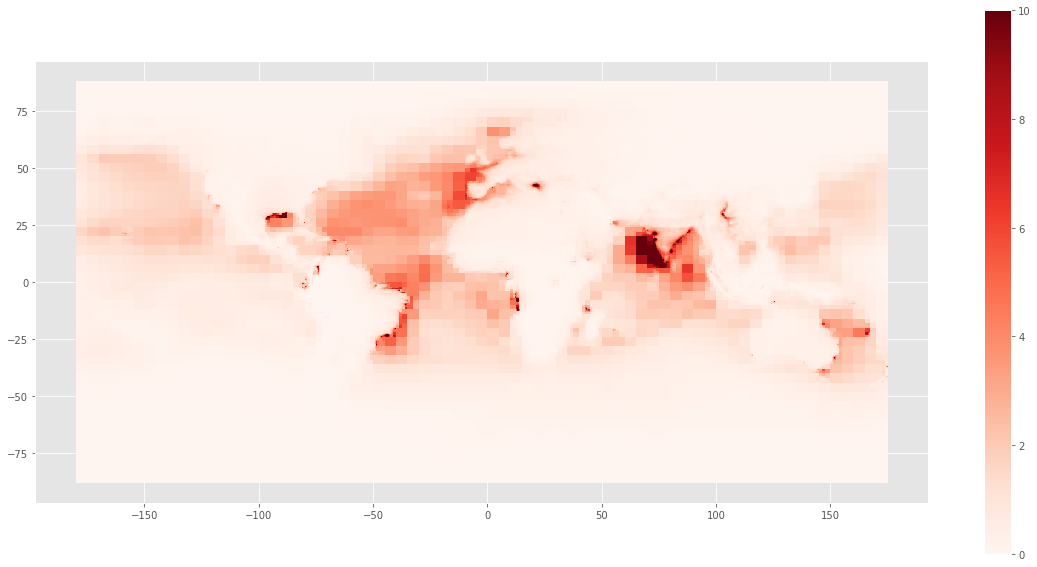

In [32]:
fig, ax = plt.subplots(1, 1)
mpl.rcParams['figure.figsize']=(20,10)
mpl.style.use('ggplot')
ROW_new.plot(linewidths=0,column='ROW_TotalPM25',ax=ax,legend=True,vmin=0, vmax=10,cmap = 'Reds')

In [10]:
# position = []
# for index in tqdm(range(len(ROW_new))):
#         if 'ROW' not in json.loads(ROW_new.iloc[index]['new_area_fraction'].replace('\'','\"')).keys():
#             continue
#         else:
#             position.append(index)

100%|████████████████████████████████████████████████████████████████████████| 273739/273739 [01:02<00:00, 4379.50it/s]


In [11]:
# ROW_only = ROW_new.iloc[position]

In [23]:
# fig, ax = plt.subplots(1, 1)
# mpl.rcParams['figure.figsize']=(20,10)
# mpl.style.use('ggplot')
# ROW_only.plot(linewidths=0,column='ROW_TotalPM25',ax=ax,legend=True,vmin=0, vmax=10,cmap = 'Reds')

In [50]:
position2 = []
for i in range(len(ROW)):
    if ROW.loc[i,'ROW_TotalPM25'] >= 2.4:
        position2.append(i)

In [51]:
ROW_HPM25 = ROW_new.iloc[position2]
ROW_HPM25

,area_fraction,ROW_TotalPM25,wholeworld_TotalPM25,geometry,TotalPop
192,{'USA': 1.000000000000001},2.650380,4.803525,"POLYGON ((-160.00000 21.00000, -158.75000 21.0...",43284.626494
196,{'USA': 0.9999999999999986},3.499794,8.549757,"POLYGON ((-158.75000 21.00000, -158.12500 21.0...",52935.005359
199,{'USA': 1.0},4.739148,22.531021,"POLYGON ((-158.12500 21.31250, -158.08594 21.3...",3200.184572
200,{'USA': 1.0},3.795064,19.651869,"POLYGON ((-158.12500 21.34375, -158.08594 21.3...",10751.147375
201,{'USA': 0.9999999999999997},6.548977,20.214713,"POLYGON ((-158.12500 21.25000, -158.04688 21.2...",60.656974
...,...,...,...,...,...
273730,{'NZL': 0.9999999999999996},4.356057,15.453681,"POLYGON ((174.84375 -36.87500, 175.00000 -36.8...",32705.278134
273735,{'NZL': 1.0},3.591310,13.430766,"POLYGON ((174.92188 -37.12500, 175.00000 -37.1...",23655.892511
273736,{'NZL': 1.0},4.548388,18.255088,"POLYGON ((174.92188 -37.06250, 175.00000 -37.0...",23694.283337
273737,{'NZL': 1.0},5.429956,22.391111,"POLYGON ((174.92188 -37.00000, 175.00000 -37.0...",10540.864873


In [52]:
positio3 = []
for index in tqdm(range(len(ROW_HPM25))):
        if 'ROW' not in json.loads(ROW_HPM25.iloc[index]['area_fraction'].replace('\'','\"')).keys():
            continue
        else:
            positio3.append(index)

100%|██████████████████████████████████████████████████████████████████████████| 30116/30116 [00:05<00:00, 5922.63it/s]


In [64]:
ROW_only_HPM25 = ROW_HPM25.iloc[positio3]
ROW_only_HPM25.reset_index(inplace=True)
ROW_only_HPM25

,index,area_fraction,ROW_TotalPM25,wholeworld_TotalPM25,geometry,TotalPop
0,32658,{'ROW': 1},8.746867,14.244910,"POLYGON ((-67.10938 18.12500, -67.03125 18.125...",13075.587884
1,32659,{'ROW': 1},8.976682,14.645994,"POLYGON ((-67.10938 18.18750, -67.03125 18.187...",9625.903334
2,32698,{'ROW': 1},9.591119,14.037329,"POLYGON ((-67.03125 18.00000, -66.87500 18.000...",51039.892585
3,32699,{'ROW': 1},8.702727,14.121415,"POLYGON ((-67.03125 18.12500, -66.87500 18.125...",13172.996121
4,32700,{'ROW': 1},8.774051,14.061524,"POLYGON ((-67.03125 18.25000, -66.87500 18.250...",50922.098267
...,...,...,...,...,...,...
328,273353,{'ROW': 1},4.993984,6.936557,"POLYGON ((159.92188 -9.40625, 159.96094 -9.406...",0.000000
329,273354,{'ROW': 1},2.717839,4.419765,"POLYGON ((159.96094 -9.50000, 160.00000 -9.500...",354.382372
330,273355,{'ROW': 1},4.662501,6.473130,"POLYGON ((159.96094 -9.46875, 160.00000 -9.468...",37564.001598
331,273356,{'ROW': 1},5.677293,7.538975,"POLYGON ((159.96094 -9.43750, 160.00000 -9.437...",12628.976797


<AxesSubplot:>

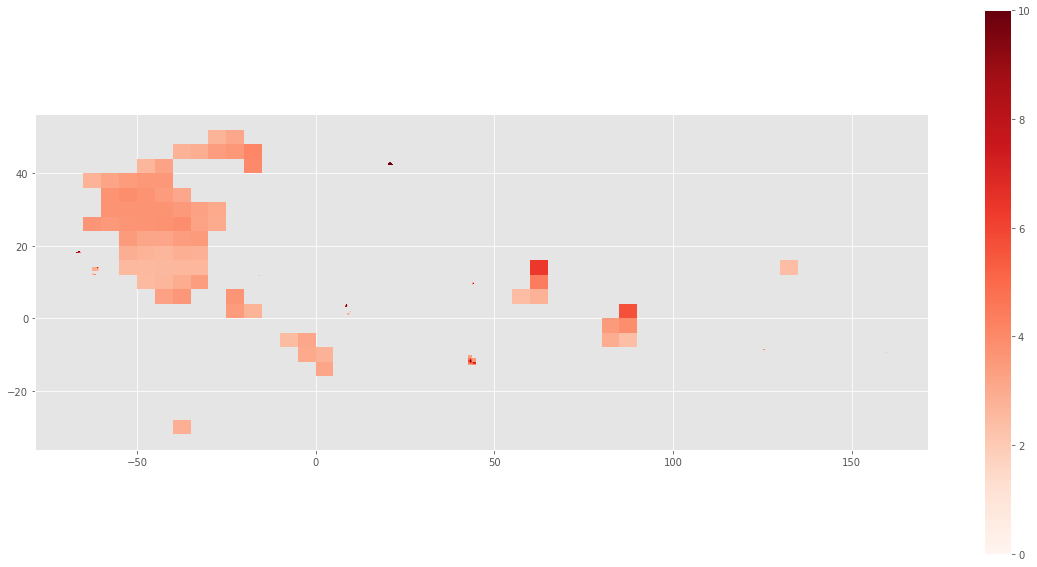

In [56]:
fig, ax = plt.subplots(1, 1)
mpl.rcParams['figure.figsize']=(20,10)
mpl.style.use('ggplot')
ROW_only_HPM25.plot(linewidths=0,column='ROW_TotalPM25',ax=ax,legend=True,vmin=0, vmax=10,cmap = 'Reds')

<AxesSubplot:>

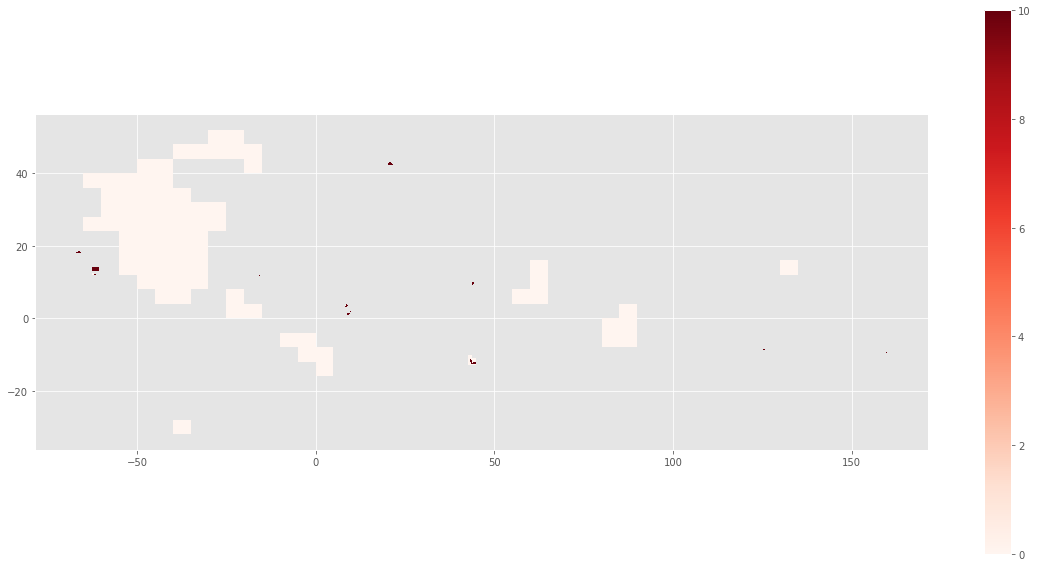

In [55]:
fig, ax = plt.subplots(1, 1)
mpl.rcParams['figure.figsize']=(20,10)
mpl.style.use('ggplot')
ROW_only_HPM25.plot(linewidths=0,column='TotalPop',ax=ax,legend=True,vmin=0, vmax=10,cmap = 'Reds')

In [62]:
position4 = []
for i in range(len(ROW_only_HPM25)):
    if ROW_only_HPM25.loc[i,'TotalPop'] > 0:
        position4.append(i)

In [65]:
ROW_only_HPM25_Hpop = ROW_only_HPM25.iloc[position4]
ROW_only_HPM25_Hpop.reset_index(inplace=True)

In [66]:
ROW_only_HPM25_Hpop

,level_0,index,area_fraction,ROW_TotalPM25,wholeworld_TotalPM25,geometry,TotalPop
0,0,32658,{'ROW': 1},8.746867,14.244910,"POLYGON ((-67.10938 18.12500, -67.03125 18.125...",13075.587884
1,1,32659,{'ROW': 1},8.976682,14.645994,"POLYGON ((-67.10938 18.18750, -67.03125 18.187...",9625.903334
2,2,32698,{'ROW': 1},9.591119,14.037329,"POLYGON ((-67.03125 18.00000, -66.87500 18.000...",51039.892585
3,3,32699,{'ROW': 1},8.702727,14.121415,"POLYGON ((-67.03125 18.12500, -66.87500 18.125...",13172.996121
4,4,32700,{'ROW': 1},8.774051,14.061524,"POLYGON ((-67.03125 18.25000, -66.87500 18.250...",50922.098267
...,...,...,...,...,...,...,...
226,326,273351,{'ROW': 1},5.149110,6.979289,"POLYGON ((159.92188 -9.46875, 159.96094 -9.468...",18074.146633
227,327,273352,{'ROW': 1},7.030109,8.948671,"POLYGON ((159.92188 -9.43750, 159.96094 -9.437...",18477.680804
228,329,273354,{'ROW': 1},2.717839,4.419765,"POLYGON ((159.96094 -9.50000, 160.00000 -9.500...",354.382372
229,330,273355,{'ROW': 1},4.662501,6.473130,"POLYGON ((159.96094 -9.46875, 160.00000 -9.468...",37564.001598


In [67]:
df_shp = gpd.read_file('C:/Users/15311/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [93]:
df_shp[df_shp['ADM0_A3']=='IDN']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."


In [95]:
ROW_only_HPM25_Hpop.iloc[185]

level_0                                                               267
index                                                              133029
area_fraction                                                  {'ROW': 1}
ROW_TotalPM25                                                     3.75306
wholeworld_TotalPM25                                               36.019
geometry                POLYGON ((43.75 9.5, 43.90625 9.5, 43.90625 9....
TotalPop                                                          31920.4
Name: 185, dtype: object

In [94]:
from tqdm import tqdm
for i in tqdm(range(len(df_shp))):
    for j in range(len(ROW_only_HPM25_Hpop)):
        a = df_shp.loc[i].geometry.intersection(ROW_only_HPM25_Hpop.iloc[j].geometry).area
        if a == 0:
            pass
        else:
            print(i,j,df_shp.loc[i,'ADM0_A3'],a)

  9%|██████▉                                                                          | 22/255 [01:04<01:39,  2.34it/s]

21 185 SOL 0.01953125
21 186 SOL 0.01953125
21 188 SOL 0.078125
21 189 SOL 0.078125
21 192 SOL 0.01953125
21 193 SOL 0.01953125
21 194 SOL 0.01953125
21 195 SOL 0.01953125
21 198 SOL 0.078125
21 199 SOL 0.01953125
21 200 SOL 0.01953125


 25%|████████████████████▋                                                            | 65/255 [02:37<01:46,  1.79it/s]

65 124 KOS 0.01953125
65 125 KOS 0.01953125
65 126 KOS 0.01953125
65 127 KOS 0.01953125
65 128 KOS 0.01953125
65 129 KOS 0.01953125
65 130 KOS 0.01953125
65 131 KOS 0.01953125
65 132 KOS 0.01953125
65 133 KOS 0.01953125
65 134 KOS 0.01953125
65 135 KOS 0.01953125
65 136 KOS 0.01953125
65 137 KOS 0.01953125
65 138 KOS 0.01953125
65 139 KOS 0.01953125
65 140 KOS 0.01953125
65 141 KOS 0.01953125
65 142 KOS 0.01953125
65 143 KOS 0.01953125
65 144 KOS 0.01953125
65 145 KOS 0.01953125
65 146 KOS 0.01953125
65 147 KOS 0.01953125
65 148 KOS 0.01953125
65 149 KOS 0.01953125
65 150 KOS 0.0048828125
65 151 KOS 0.0048828125
65 152 KOS 0.01953125
65 153 KOS 0.01953125
65 154 KOS 0.01953125
65 155 KOS 0.01953125
65 156 KOS 0.0048828125
65 157 KOS 0.0048828125
65 158 KOS 0.01953125
65 159 KOS 0.01953125
65 160 KOS 0.01953125
65 161 KOS 0.01953125
65 162 KOS 0.01953125


 47%|█████████████████████████████████████▋                                          | 120/255 [03:18<00:37,  3.63it/s]

118 202 TLS 0.01953125
118 203 TLS 0.01953125
118 204 TLS 0.007710248932486919
118 205 TLS 0.001220703125
118 206 TLS 0.0010053238083143356
118 207 TLS 6.191973924498768e-06
118 208 TLS 0.001220703125
118 209 TLS 0.001220703125
118 210 TLS 0.0004297698983248237
118 211 TLS 0.01953125
118 212 TLS 0.01953125
118 213 TLS 0.001220703125
118 214 TLS 0.001220703125
118 215 TLS 0.0007176677773183667
118 216 TLS 0.001220703125
118 217 TLS 0.001220703125
118 218 TLS 0.000751022557934823
118 219 TLS 7.221242653331143e-06


 59%|███████████████████████████████████████████████▎                                | 151/255 [03:33<00:43,  2.37it/s]

151 84 GNB 0.004436828107029976
151 85 GNB 0.004762630125869919
151 86 GNB 0.001220703125
151 87 GNB 0.001220703125
151 88 GNB 0.001220703125
151 89 GNB 0.001220703125
151 90 GNB 0.00035468884995659163
151 91 GNB 0.0048828125
151 92 GNB 0.0008976075750696944
151 93 GNB 0.001220703125
151 94 GNB 0.001220703125
151 95 GNB 0.001220703125
151 96 GNB 0.0001368202288754381
151 97 GNB 0.0011920643863986675
151 98 GNB 0.001220703125
151 99 GNB 0.001220703125
151 100 GNB 0.0048828125
151 102 GNB 0.00022335557080485768
151 103 GNB 0.0009320368092404814
151 104 GNB 0.001220703125
151 105 GNB 0.0033428223270432034
151 106 GNB 0.00040880649698882895
151 107 GNB 0.0011583464319269317
151 108 GNB 0.0048016944040849465


 64%|███████████████████████████████████████████████████▍                            | 164/255 [06:19<03:31,  2.32s/it]

163 111 GNQ 0.07552869064062696
163 112 GNQ 0.029966135853569824
163 113 GNQ 0.0007329027751017553
163 114 GNQ 0.0048828125
163 115 GNQ 0.004880711691231686
163 116 GNQ 0.017672647357578508
163 117 GNQ 0.0048828125
163 118 GNQ 0.0047259599717563066
163 119 GNQ 0.0010382632266675673
163 120 GNQ 0.005809008031122869
163 121 GNQ 0.0009102781215238781
163 122 GNQ 0.054471788847324384
163 123 GNQ 0.05778051814636336


 77%|█████████████████████████████████████████████████████████████▊                  | 197/255 [07:36<00:20,  2.82it/s]

196 76 GRD 0.02600395434001355
197

 78%|██████████████████████████████████████████████████████████████                  | 198/255 [07:36<00:17,  3.28it/s]

 75 VCT 0.002645759023891719
197 79 VCT 0.026092186908762954


 78%|██████████████████████████████████████████████████████████████▋                 | 200/255 [07:36<00:13,  3.96it/s]

199 77 LCA 0.001126630214019997
199 78 LCA 0.030101198498283847
199 80 LCA 2.313882860820757e-05
199 81 LCA 0.010526495122656528


 81%|████████████████████████████████████████████████████████████████▉               | 207/255 [07:38<00:08,  5.63it/s]

207 0 PRI 0.0048828125
207 1 PRI 0.0048828125
207 2 PRI 0.01953125
207 3 PRI 0.01953125
207 4 PRI 0.01953125
207 5 PRI 0.0048828125
207 6 PRI 0.01953125
207 7 PRI 0.01953125
207 8 PRI 0.0048828125
207 9 PRI 0.0048828125
207 10 PRI 0.0048828125
207 11 PRI 0.01953125
207 12 PRI 0.01953125
207 13 PRI 0.001220703125
207 14 PRI 0.001220703125
207 15 PRI 0.0048828125
207 16 PRI 0.001220703125
207 17 PRI 0.001220703125
207 18 PRI 0.01953125
207 19 PRI 0.01953125
207 20 PRI 0.01953125
207 21 PRI 0.0048828125
207 22 PRI 0.01953125
207 23 PRI 0.01953125
207 24 PRI 0.01953125
207 25 PRI 0.0048828125
207 26 PRI 0.001220703125
207 27 PRI 0.001220703125
207 28 PRI 0.001220703125
207 29 PRI 0.001220703125
207 30 PRI 0.0048828125
207 31 PRI 0.001220703125
207 32 PRI 0.001220703125
207 33 PRI 0.001220703125
207 34 PRI 0.001220703125
207 35 PRI 0.01953125
207 36 PRI 0.01953125
207 37 PRI 0.001220703125
207 38 PRI 0.001220703125
207 39 PRI 0.001220703125
207 40 PRI 0.001220703125
207 41 PRI 0.0048828125


 85%|████████████████████████████████████████████████████████████████████            | 217/255 [07:40<00:07,  4.81it/s]

216 163 COM 0.006349481445544538
216 164 COM 0.004328417532836415
216 165 COM 0.002902894660377113
216 166 COM 0.02132117646914577
216 167 COM 0.01653521152643921
216 168 COM 0.012687779690342894
216 169 COM 0.013978087297239943
216 170 COM 0.0006458448976824366
216 171 COM 0.0002533480714500733
216 172 COM 0.006089211442988494
216 173 COM 0.00011382879864506373
216 174 COM 0.0004579855574638065
216 175 COM 0.002414486056576888
216 177 COM 0.001220703125
216 178 COM 0.0010345089651730673
216 179 COM 0.003608562609400426
216 180 COM 0.001220703125
216 181 COM 0.0005598964697722516
216 182 COM 0.00399747184364394
216 183 COM 0.0008306121371706296
216 187 COM 0.00093605388317344
216 197 COM 0.006386318585577176
216 201 COM 0.030879488744376862


 87%|█████████████████████████████████████████████████████████████████████▎          | 221/255 [07:41<00:07,  4.32it/s]

220 109 JEY 0.001220703125
220 110 JEY 0.0012060501896847715


 92%|█████████████████████████████████████████████████████████████████████████▍      | 234/255 [07:44<00:08,  2.34it/s]

233 220 SLB 0.01953125
233 221 SLB 0.01462650554202237
233 222 SLB 0.0048828125
233 223 SLB 0.0036330408813612033
233 224 SLB 0.0008524926831552415
233 225 SLB 0.001220703125
233 226 SLB 0.001220703125
233 227 SLB 0.00021748778908754518
233 228 SLB 0.001220703125
233 229 SLB 0.001220703125
233 230 SLB 0.00013783816951477284


100%|████████████████████████████████████████████████████████████████████████████████| 255/255 [07:50<00:00,  1.85s/it]


In [90]:
total_pop_IDN = 0
from tqdm import tqdm
for i in tqdm(range(len(df_shp))):
    for j in range(len(ROW_only_HPM25_Hpop)):
        a = df_shp.loc[i].geometry.intersection(ROW_only_HPM25_Hpop.iloc[j].geometry).area
        if a == 0:
            pass
        else:
            total_pop_IDN += ROW_only_HPM25_Hpop.loc[j,'TotalPop']
total_pop_IDN

100%|████████████████████████████████████████████████████████████████████████████████| 255/255 [05:43<00:00,  1.35s/it]


7300529.658000349

In [91]:
total_pop_IDN/ROW_only_HPM25_Hpop.TotalPop.sum()

0.9973208020481387

In [38]:
file = open("C:/Users/15311/Desktop/comparison/Total_pop_new.json", "r")
population = file.read()
population = json.loads(population)

In [39]:
population['ROW']

11226971.741180781

In [36]:
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)

In [86]:
pro_mort_tol['ROW']['IDN']

1970.5444873948138

In [85]:
print(sorted(pro_mort_tol['ROW'].items(), key=lambda item: item[1],reverse = True)[:10])

[('ROW', 138069.2609316298), ('IND', 65218.38116212078), ('USA', 19134.857845391176), ('BRA', 14345.255377231795), ('CHN', 12840.140694010719), ('GBR', 9677.414683422463), ('FRA', 8448.170621294523), ('ESP', 7545.805466133798), ('BGD', 5297.663237460946), ('DEU', 5125.169584113537)]
